First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11740\697758813.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11740\697758813.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

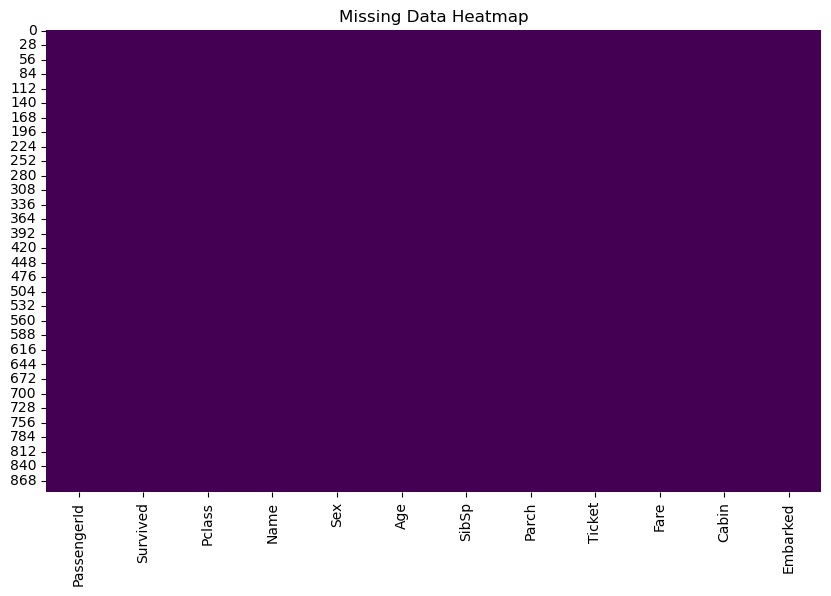

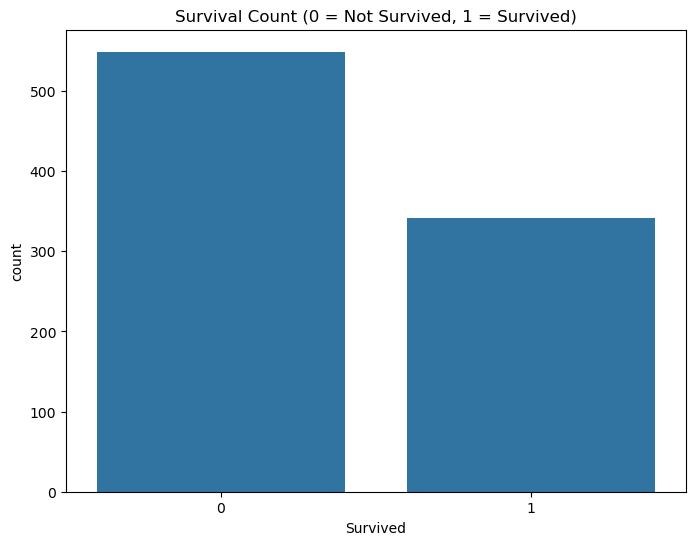


Survival Rate: 38.38%


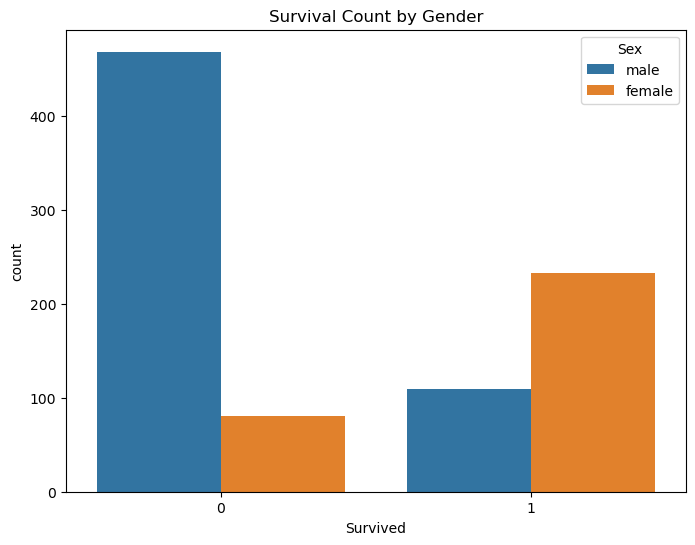


Survival Rate by Gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


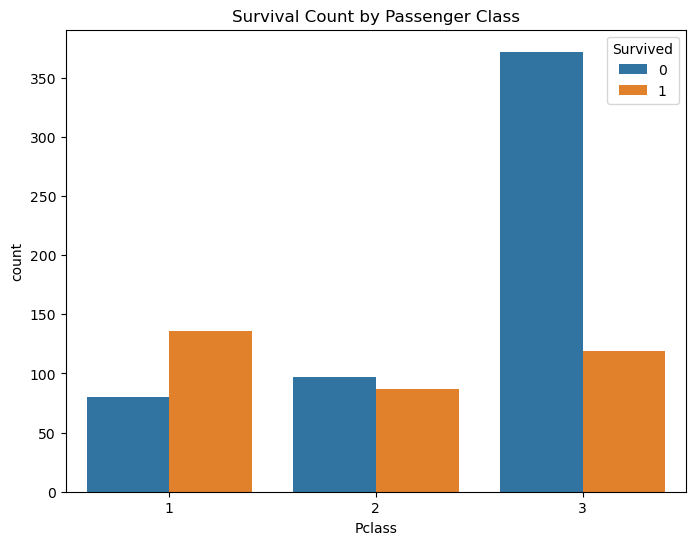


Survival Rate by Passenger Class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


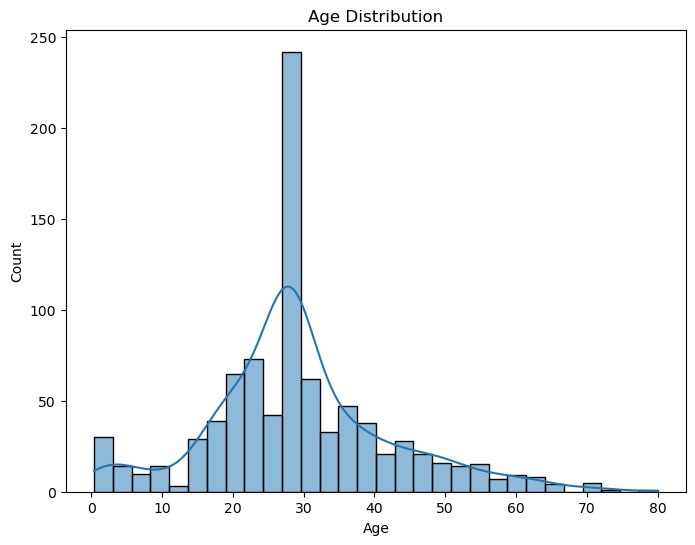

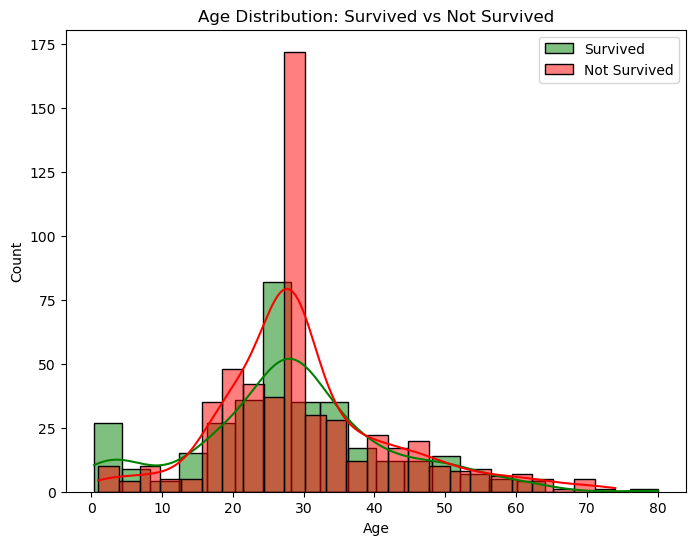

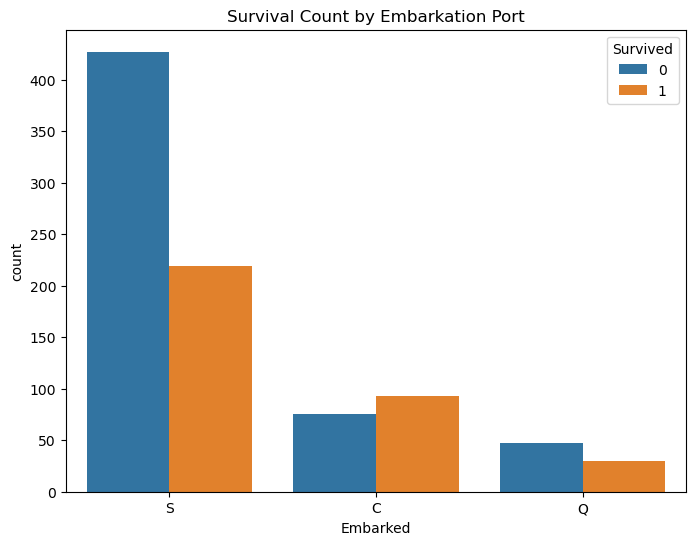


Survival Rate by Embarkation Port:
Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64


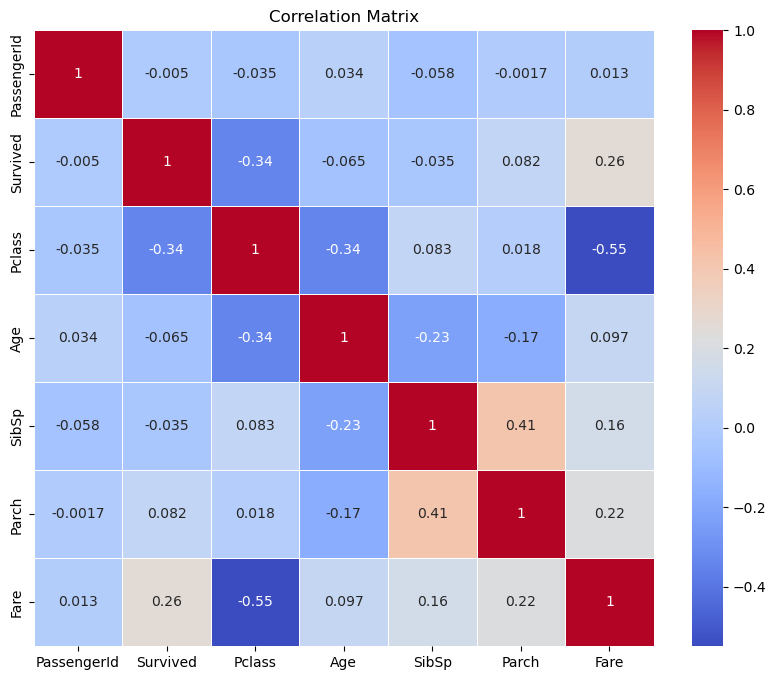


Key Insights:
- Females had a much higher survival rate than males.
- Passengers in higher classes had better survival rates.
- Younger passengers had a higher likelihood of survival.
- Passengers who embarked from different ports had varying survival rates.


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset from local file path
file_path = r"D:\Intership projects\titanic.csv"  # Use raw string (r) to handle backslashes properly
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Data Cleaning

# Fill missing age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing cabin values with 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)

# Fill missing embarked values with the mode (most common port)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Verify missing values are handled
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Exploratory Data Analysis (EDA)

# 1. Summary Statistics
print("\nSummary Statistics:")
print(df.describe())

# 2. Visualize Missing Data
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# 3. Survival Rate
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = Not Survived, 1 = Survived)')
plt.show()

# Survival rate percentage
survival_rate = df['Survived'].mean() * 100
print(f"\nSurvival Rate: {survival_rate:.2f}%")

# 4. Survival Rate by Gender
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.show()

# Calculate survival rate by gender
gender_survival = df.groupby('Sex')['Survived'].mean() * 100
print("\nSurvival Rate by Gender:")
print(gender_survival)

# 5. Survival Rate by Passenger Class (Pclass)
plt.figure(figsize=(8,6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

# Calculate survival rate by passenger class
class_survival = df.groupby('Pclass')['Survived'].mean() * 100
print("\nSurvival Rate by Passenger Class:")
print(class_survival)

# 6. Age Distribution
plt.figure(figsize=(8,6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Age vs Survival
plt.figure(figsize=(8,6))
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, color='green', label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], kde=True, color='red', label='Not Survived')
plt.title('Age Distribution: Survived vs Not Survived')
plt.legend()
plt.show()

# 7. Survival Rate by Embarked
plt.figure(figsize=(8,6))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarkation Port')
plt.show()

# Calculate survival rate by embarkation port
embarked_survival = df.groupby('Embarked')['Survived'].mean() * 100
print("\nSurvival Rate by Embarkation Port:")
print(embarked_survival)

# 8. Correlation Matrix - Select only numerical columns
plt.figure(figsize=(10,8))

# Select numerical columns only
numerical_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix for numerical columns
corr_matrix = numerical_df.corr()

# Plot heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Conclusion and Findings
print("\nKey Insights:")
print("- Females had a much higher survival rate than males.")
print("- Passengers in higher classes had better survival rates.")
print("- Younger passengers had a higher likelihood of survival.")
print("- Passengers who embarked from different ports had varying survival rates.")
